### Neshyba & Deloya Garcia, 2023

# ClimateStats

## Overview
The idea of this module is to develop your skill and insights into the statistical analysis of weather records that lead to climate. The weather data we'll be accessing is archived at the NOAA website, https://gml.noaa.gov/dv/data/index.php?category=Meteorology&frequency=Hourly%2BAverages. We'll focus (as the name suggests) on statistics of _hourly_ measurements of key weather variables, including temperature, wind speed, wind direction. 

The main computing resource we'll be using to look at these data is the data management tool *pandas* to organize data and metadata associated with carbon emissions over time. We'll be using *pandas* a little more here than previously, in that we'll be using it to search for flags that indicate missing or bad data. 

In term of climate literacy, important lessons here are idea that climate science is a statistical science, specifically the statistics of weather, and therefore we would expect that statistical evidence of climate change would be most pronounced in polar regions.   


## Learning goals
1. I can find and interpret metadata for NOAA weather records.
1. I can use *pandas* to read in tables of data as dataframes, implement quality-control measures, and combine dataframes.
1. I can explain how probabilities densities are related to histograms, describe circumstances under which they might preferable, and compute them from measurements.
1. I can use historical weather records to describe statistical evidence of polar amplification.  

In [1]:
# Get some resources
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib notebook

### Interpreting metadata
It's often useful to inspect metadata associated with a data set before diving in. A good way to start out this module is to just go to the NOAA website and look around! Locate the "i" icons on the right-hand side, and find  answers to the following questions:

1. The three-letter _region code_ tells you where the data were collected. What does "BRW" stand for?
1. The _units_ of numerical data are specified in there somewhere. What are the units of temperature? Of wind speed?
1. _flags_ let you know if data are missing. For the NOAA dataset, these flags all look something like "-99.9", but specfics vary. What's the flag for missing temperature?

Enter your answers in the cell below.

### BEGIN SOLUTION

1. BRW stands for Barrow
1. Units are degrees C for temperature. For wind speed, m/s
1. The flag for missing temperature is -999.9

### END SOLUTION

### Loading (and plotting) time series of hourly temperature data, using Pandas
Next, we'll collect some data for a recent year from the NOAA website, as a *pandas dataframe*. Execute the cell below and have a look at the output.

,station,year,month,day,hour,winddirection,windspeed,temperature
0,BRW,2022,1,1,0,328,3.5,-26.6
1,BRW,2022,1,1,1,338,3.6,-26.8
2,BRW,2022,1,1,2,345,3.5,-27.3
3,BRW,2022,1,1,3,349,3.8,-26.7
4,BRW,2022,1,1,4,350,3.8,-26.7
...,...,...,...,...,...,...,...,...
8634,BRW,2022,12,31,19,194,1.2,-17.0
8635,BRW,2022,12,31,20,182,1.3,-17.3
8636,BRW,2022,12,31,21,170,1.6,-17.6
8637,BRW,2022,12,31,22,197,2.1,-18.5


<IPython.core.display.Javascript object>


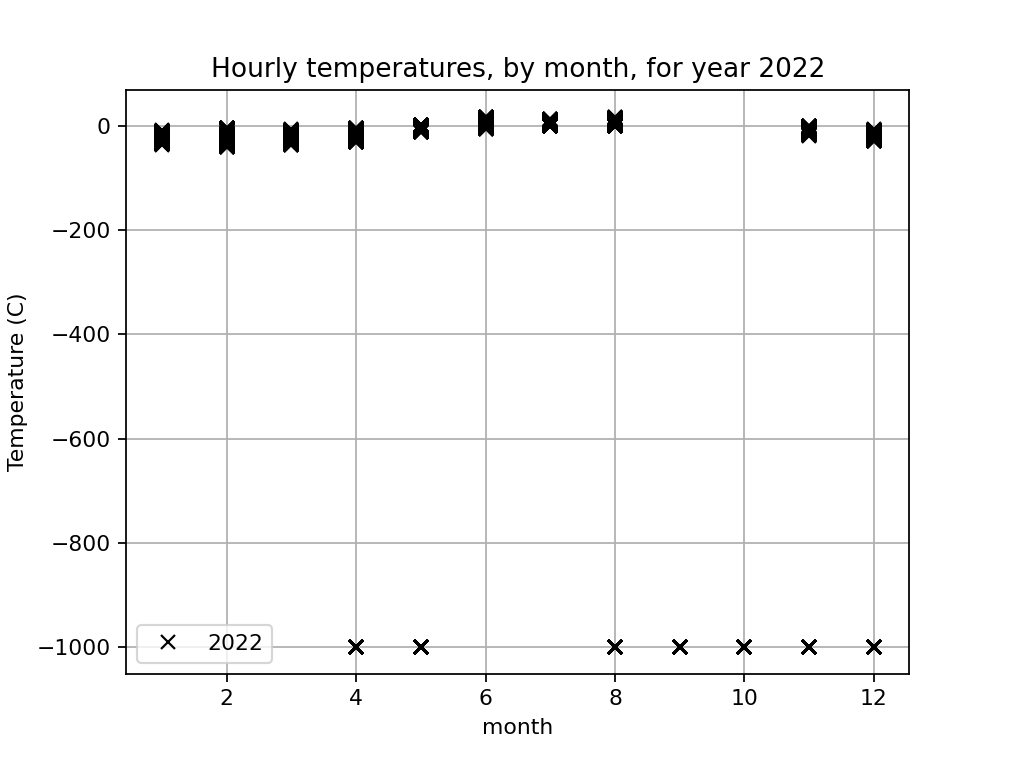

In [3]:
# Load the 2022 data
df2022 = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_2022.txt',
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,4,5,6,9],
                        names=['station','year','month','day','hour','winddirection','windspeed','temperature']) 

# Print some information about the dataframe
display(df2022)

# Plotting the temperatures as a function of month
plt.figure()
plt.plot(df2022['month'], df2022['temperature'], 'kx', label='2022')
plt.xlabel('month')
plt.ylabel('Temperature (C)')
plt.title('Hourly temperatures, by month, for year 2022')
plt.grid()
plt.legend()

### Pause for analysis
Take a close look at this graph. You'll probably notice some absurdly low "temperatures", close to -1000 degrees! Don't be alarmed -- this is not https://en.wikipedia.org/wiki/The_Day_After_Tomorrow. Those values are flags that mark the data as being bad or missing. This is a quality-control issue that we'll attend to in a bit, but in the meantime we'll practice getting other data.

In the cell below, do the same, but for data from the year 1977 (load, display, and plot).

,station,year,month,day,hour,winddirection,windspeed,temperature
0,BRW,1977,1,1,0,72,6.3,-20.1
1,BRW,1977,1,1,1,72,6.3,-20.3
2,BRW,1977,1,1,2,70,6.7,-20.5
3,BRW,1977,1,1,3,76,6.7,-20.5
4,BRW,1977,1,1,4,73,6.7,-20.4
...,...,...,...,...,...,...,...,...
8755,BRW,1977,12,31,19,145,3.6,-16.4
8756,BRW,1977,12,31,20,66,1.3,-14.9
8757,BRW,1977,12,31,21,75,2.2,-15.6
8758,BRW,1977,12,31,22,161,6.7,-17.3


<IPython.core.display.Javascript object>


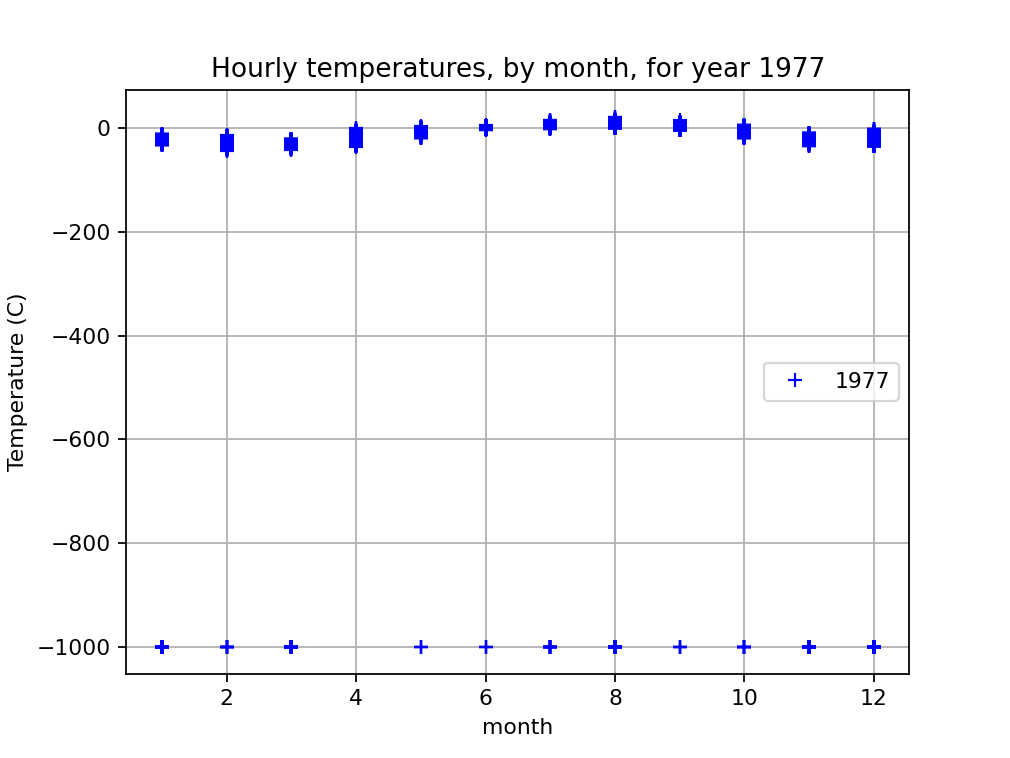

In [4]:
### BEGIN SOLUTION
df1977 = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_1977.txt',
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,4,5,6,9],
                        names=['station','year','month','day','hour','winddirection','windspeed','temperature']) 

# Print some information about the dataframe
display(df1977)

# Plot the temperatures as a function of month
plt.figure()
plt.plot(df1977['month'], df1977['temperature'], 'b+', label='1977')
plt.xlabel('month')
plt.ylabel('Temperature (C)')
plt.title('Hourly temperatures, by month, for year 1977')
plt.legend()
plt.grid()
### END SOLUTION

### Quality control
The code below directs *pandas* to look at each row, and if the temperature is -999.9, it records the index of that row, in a list called "badindices". The next line of code is a very cool Pandas functionality: it drops (gets rid of) those indices from the dataframe! We also re-plot the data, just to be sure.

By the way, if you execute this cell twice, you'll see that the second time it says it isn't dropping any points -- because (as I'm sure you've guessed) it got all the bad data the first time.

I am dropping this many missing data points:  2584


<IPython.core.display.Javascript object>


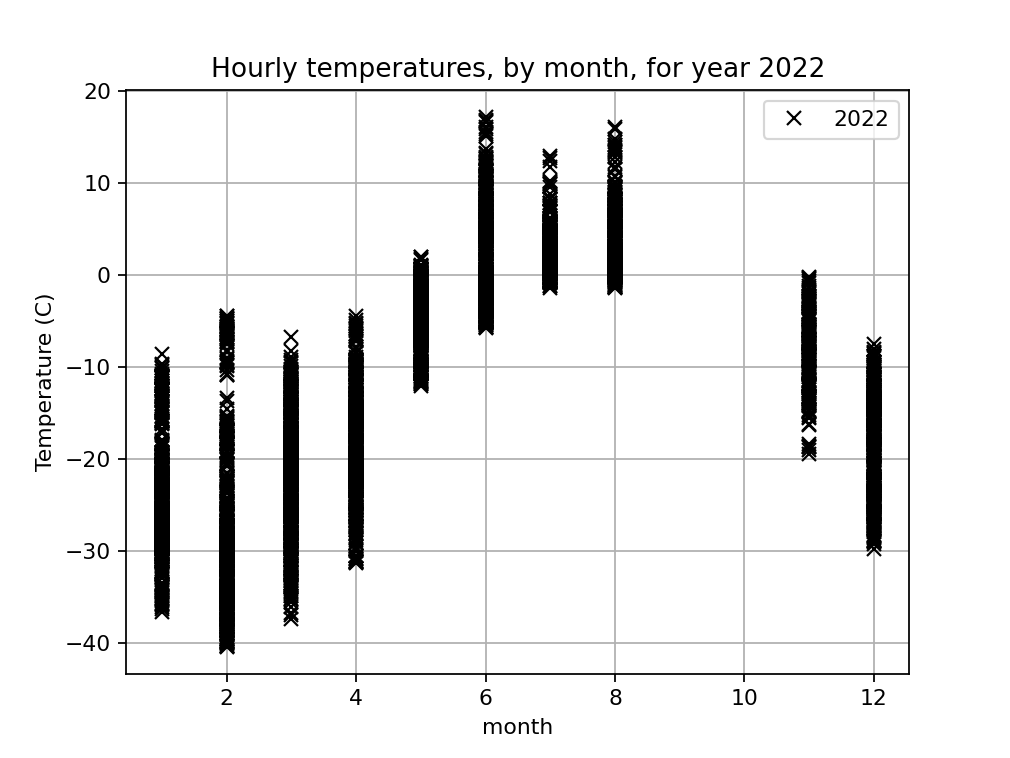

In [5]:
# Find bad temperatures
badindices = df2022[ df2022['temperature'] == -999.9 ].index
print('I am dropping this many missing data points: ', len(badindices))
df2022.drop(badindices,inplace=True)

# Plot
plt.figure()
plt.plot(df2022['month'],df2022['temperature'], 'kx', label='2022')
plt.xlabel('month')
plt.ylabel('Temperature (C)')
plt.title('Hourly temperatures, by month, for year 2022')
plt.grid()
plt.legend()

### Your turn
In the cells below, do the same for the "1977" dataframe (get rid of bad data, and plot hourly temperatures by month).

I am dropping this many missing data points:  606


<IPython.core.display.Javascript object>


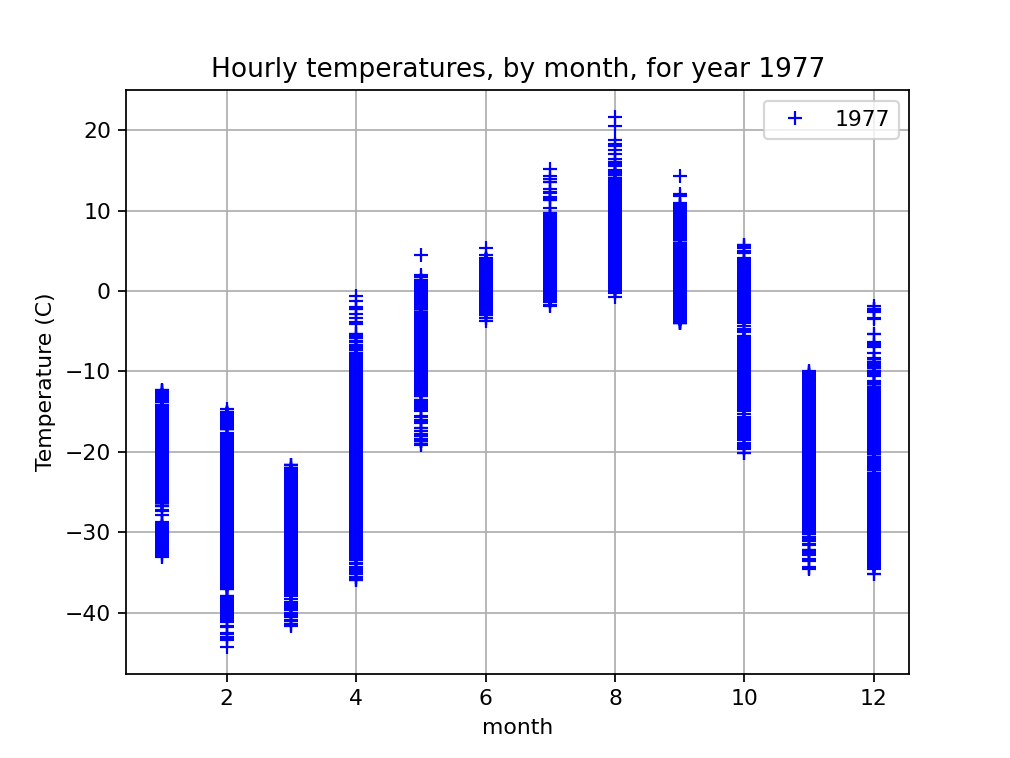

In [6]:
### BEGIN SOLUTION
badindices = df1977[ df1977['temperature'] == -999.9 ].index
print('I am dropping this many missing data points: ', len(badindices))
df1977.drop(badindices,inplace=True)

plt.figure()
plt.plot(df1977['month'], df1977['temperature'], 'b+', label='1977')
plt.xlabel('month')
plt.ylabel('Temperature (C)')
plt.title('Hourly temperatures, by month, for year 1977')
plt.grid()
plt.legend()
### END SOLUTION

### Plotting hourly temperatures on the same graph
You have probably already noticed that it's a bit difficult to compare two datasets unless you graph them together. In the cell below, plot the 1977 and 2022 hourly temperature data on the same graph (still by month), using the black/blue coding you did before and the label/legend method.

<IPython.core.display.Javascript object>


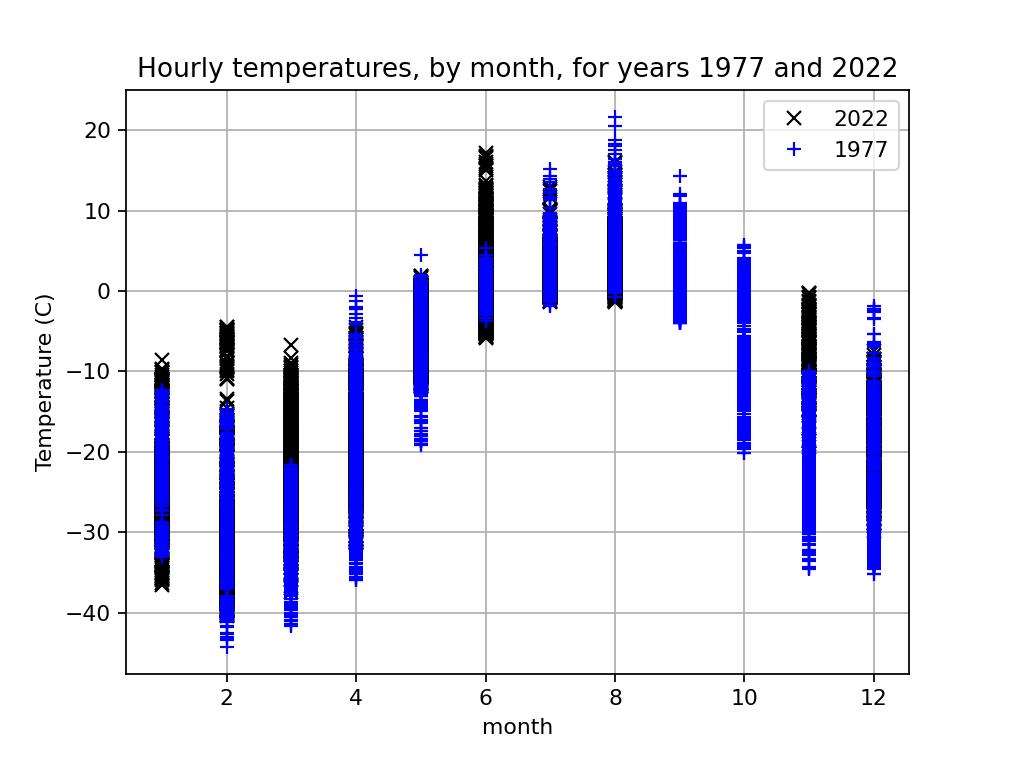

In [7]:
### BEGIN SOLUTION
plt.figure()
plt.plot(df2022['month'], df2022['temperature'], 'kx', label='2022')
plt.plot(df1977['month'], df1977['temperature'], 'b+', label='1977')
plt.xlabel('month')
plt.ylabel('Temperature (C)')
plt.title('Hourly temperatures, by month, for years 1977 and 2022')
plt.grid()
plt.legend()

### END SOLUTION

### Pause for analysis
Take a moment to examine the plot you just made, and use the cell below to record a few observations about the seasonal variation it reveals. 

1. What are the hottest months at BRW (Utqiagvik)?
1. What are the coldest months?
1. Although it's not considered "climate" unless one is averaging over (ideally) 30 years, sometimes we look at shorter time periods anyway, because that's the data we have. What stands out about the data you see? If you were to choose two months in which warming seems to be amplified over other months, what two months would those be?

### BEGIN SOLUTION
1. August is hottest
1. February is coldest
1. Warming is most in March and June

### END SOLUTION

### Focusing on a month of interest
The cell below will be used to focus on March as the "month of interest."

In [8]:
# Specify which month we want to focus on
month_of_interest = 3

### Examining hourly temperatures by day of month
The cell below shows how to extract and display hourly temperatures belonging to a certain month of the year.

,station,year,month,day,hour,winddirection,windspeed,temperature
1416,BRW,2022,3,1,0,61,2.4,-6.7
1417,BRW,2022,3,1,1,59,2.8,-8.3
1418,BRW,2022,3,1,2,65,2.3,-8.9
1419,BRW,2022,3,1,3,78,2.9,-10.5
1420,BRW,2022,3,1,4,65,3.8,-10.7
...,...,...,...,...,...,...,...,...
2155,BRW,2022,3,31,19,80,8.6,-25.5
2156,BRW,2022,3,31,20,80,8.9,-24.8
2157,BRW,2022,3,31,21,79,9.5,-24.2
2158,BRW,2022,3,31,22,80,9.5,-23.4


<IPython.core.display.Javascript object>


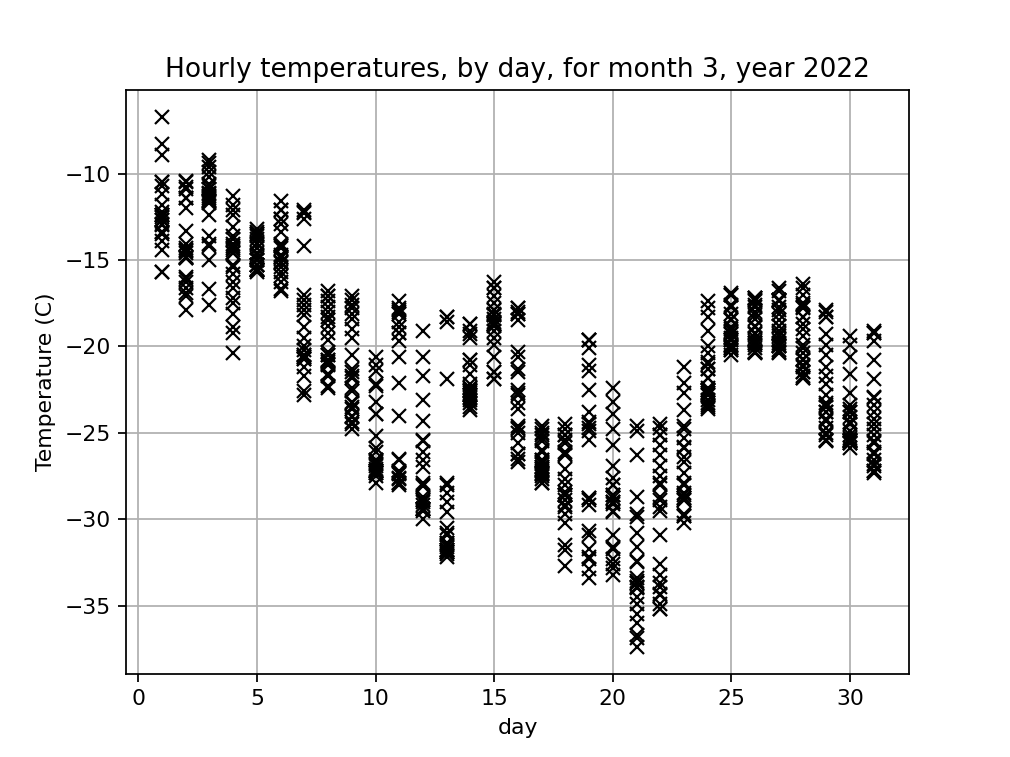

In [9]:
# Extract data belonging to the month of interest
df2022_month_of_interest = df2022[df2022['month'] == month_of_interest]
display(df2022_month_of_interest) 

# Open a figure
plt.figure()

# Convert to numpy arrays and plot the day and temperature
plt.plot(df2022_month_of_interest['day'], df2022_month_of_interest['temperature'], 'kx')
plt.title('Hourly temperatures, by day, for month '+str(month_of_interest)+', year 2022')
plt.xlabel('day')
plt.ylabel('Temperature (C)')
plt.grid()

### Your turn
Repeat what we just did, but for 1977. Let's stick with the '+' and 'blue' representation we used before.

,station,year,month,day,hour,winddirection,windspeed,temperature
1417,BRW,1977,3,1,1,350,1.3,-30.0
1418,BRW,1977,3,1,2,300,0.9,-29.4
1419,BRW,1977,3,1,3,35,4.0,-28.8
1420,BRW,1977,3,1,4,7,4.5,-28.9
1421,BRW,1977,3,1,5,353,4.5,-30.2
...,...,...,...,...,...,...,...,...
2132,BRW,1977,3,30,20,60,8.5,-25.2
2133,BRW,1977,3,30,21,58,8.0,-24.1
2134,BRW,1977,3,30,22,53,7.6,-24.3
2135,BRW,1977,3,30,23,50,6.7,-24.4


<IPython.core.display.Javascript object>


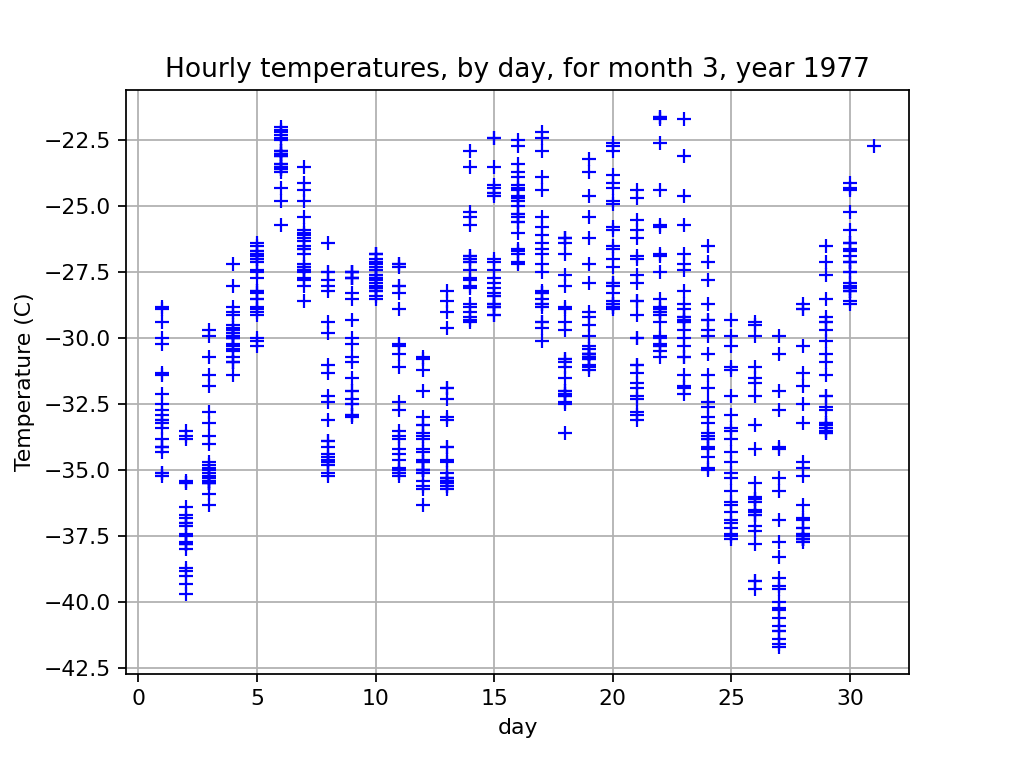

In [10]:
### BEGIN SOLUTION
# Extract data belonging to the month of interest
df1977_month_of_interest = df1977[df1977['month'] == month_of_interest]
display(df1977_month_of_interest) 

# Plotting the data
plt.figure()
plt.plot(df1977_month_of_interest['day'], df1977_month_of_interest['temperature'], 'b+')
plt.title('Hourly temperatures, by day, for month '+str(month_of_interest)+', year 1977')
plt.xlabel('day')
plt.ylabel('Temperature (C)')
plt.grid()
### END SOLUTION

### Histograms of hourly temperatures
In the foregoing, you might have noticed that it's a little hard to infer trends from visual inspection of a time series. A more useful statistical strategy is called *binning*. Binning involves grouping data into ranges of the weather variable of interest -- in this case, temperatures in a given month. Binning is a key statistical method of climate science. Numpy's binning function is the _histogram_ function, referred to below as "np.histogram".

The cell below does this for the 2022 dataset.

10
11
10


<IPython.core.display.Javascript object>


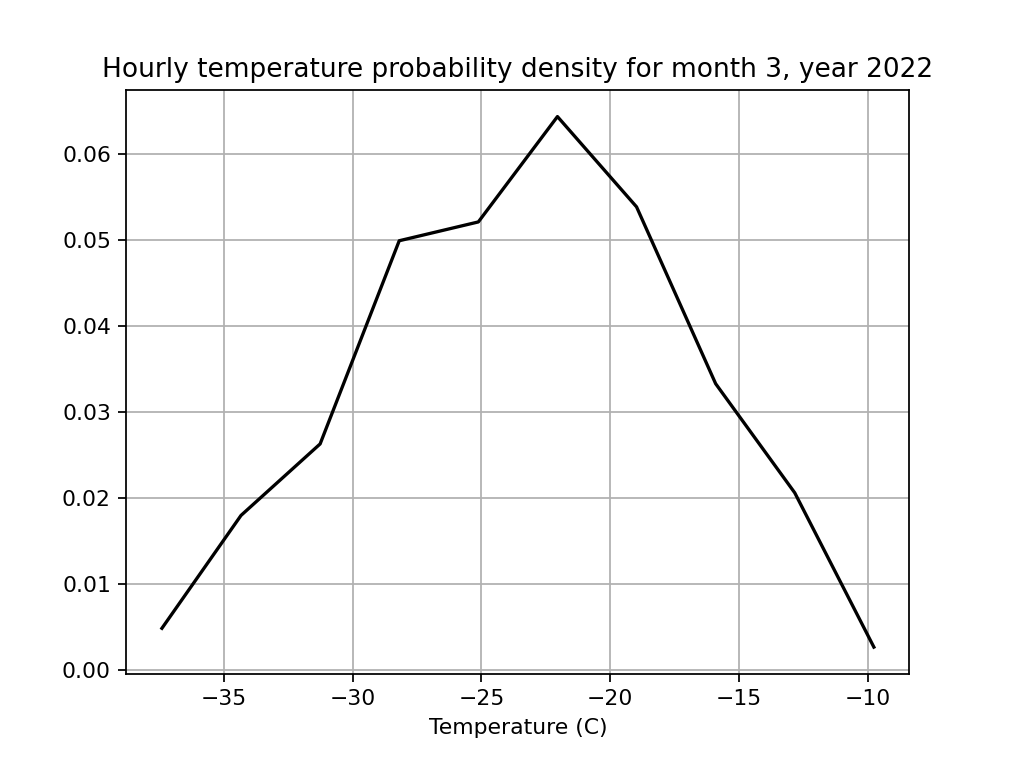

In [11]:
# Get the histogram for the modern dataset
h2022_month_of_interest, e2022_month_of_interest = np.histogram(df2022_month_of_interest['temperature'],density=True)

# Check on some array lengths
print(np.size(h2022_month_of_interest))
print(np.size(e2022_month_of_interest))
print(np.size(e2022_month_of_interest[0:-1]))

# Plot the histogram 
plt.figure()
plt.plot(e2022_month_of_interest[0:-1],h2022_month_of_interest,'k')
plt.title('Hourly temperature probability density for month '+str(month_of_interest)+', year 2022')
plt.xlabel('Temperature (C)')
plt.grid()

### Bins and bin edges in a probability density

It's worth pausing for a moment on the meaning of the x-axis in figures like the above. If we see that the peak in a probability density occurs at an x-value of (say) -22, it means that the most probable hourly temperature that month fell within a certain range of -22 degrees C. That range is called a *bin*, and is decided automatically by np.histogram -- in this case, it has decided that each bin should be about three degrees in width, e.g., -22 to -19 degrees. 

You might have noticed a strange notation here too: Why are we specifying e2022_month_of_interest[0:-1]? The short story is, a set of 10 *bins* requires that we specify 11 *edges* (AKA _bin boundaries_). So when we plot the number of observations, we leave off either the last edge. That's what the "-1" in  edgesmonthlymodern[0:-1] does.

### Your turn
In the cell below, do the following:

1. Calculate and plot the probability density of the 1977 dataset. 
1. Plot both the 2022 and 1977 probability densities on the same graph, with the label/legend method.

<IPython.core.display.Javascript object>


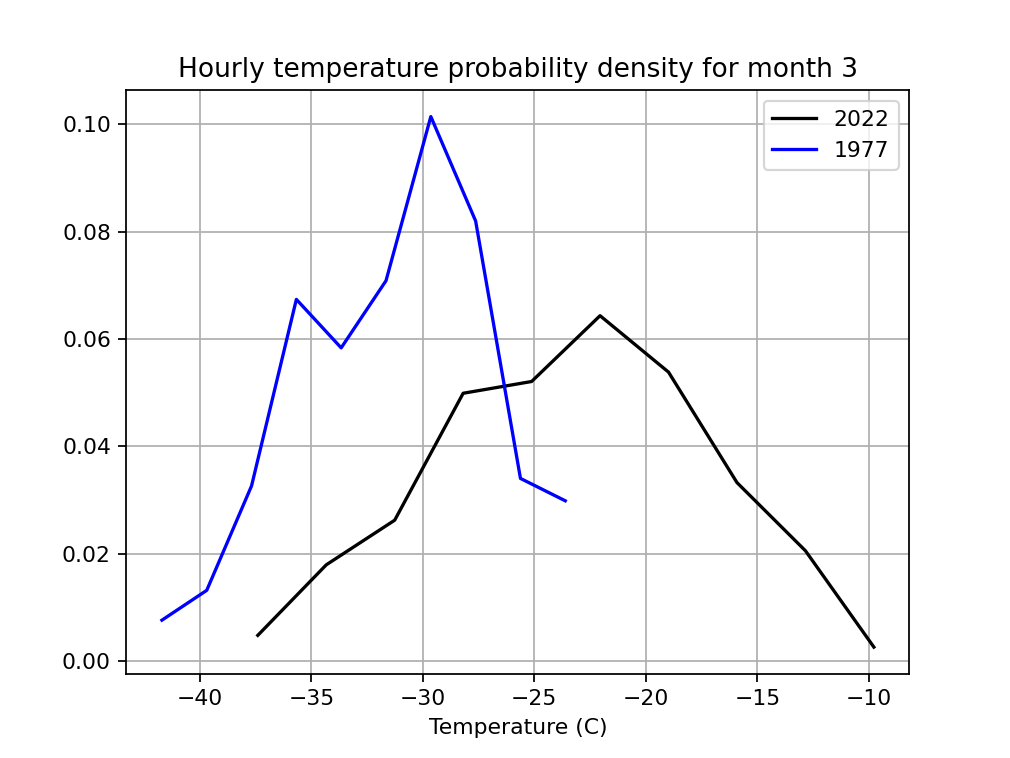

In [12]:
### BEGIN SOLUTION

h1977_month_of_interest, e1977_month_of_interest = np.histogram(df1977_month_of_interest['temperature'],density=True)
plt.figure()
plt.plot(e2022_month_of_interest[0:-1],h2022_month_of_interest,'k',label='2022')
plt.plot(e1977_month_of_interest[0:-1],h1977_month_of_interest,'b',label='1977')
plt.title('Hourly temperature probability density for month '+str(month_of_interest))
plt.xlabel('Temperature (C)')
plt.grid()
plt.legend()

### END SOLUTION

### Pause for analysis
Use the cell below to comment on what these data are telling us about climate changes in Utqiakvik between the years 1977 and 2022. Key ideas would include *most-probable temperature* and *temperature variability*, the latter corresponding to the width of the curve at approximately half its height.

### BEGIN SOLUTION

The most probable temperature in 2022 is higher than it was in 1977. Temperatures are a little more variable too.

### END SOLUTION

### Combining dataframes from multiple years
Below is an example of how to merge dataframes from multiple years. This will come in handy for building confidence in statistical inferences we can draw from these data.

In [13]:
# Modern data: load three years of data as separate dataframes
df2020 = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_2020.txt', 
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,5,6,9], 
                        names=['station','year','month','day','winddirection','windspeed','temperature']) 

df2021 = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_2021.txt', 
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,5,6,9], 
                        names=['station','year','month','day','winddirection','windspeed','temperature']) 

# Now join them and display the result
df2020s = pd.concat( [df2020, df2021, df2022])
display(df2020s)

,station,year,month,day,winddirection,windspeed,temperature,hour
0,BRW,2020,1,1,5,7.1,-25.5,NaN
1,BRW,2020,1,1,0,7.0,-25.8,NaN
2,BRW,2020,1,1,3,7.6,-25.3,NaN
3,BRW,2020,1,1,4,7.6,-25.2,NaN
4,BRW,2020,1,1,15,7.5,-25.1,NaN
...,...,...,...,...,...,...,...,...
8634,BRW,2022,12,31,194,1.2,-17.0,19.0
8635,BRW,2022,12,31,182,1.3,-17.3,20.0
8636,BRW,2022,12,31,170,1.6,-17.6,21.0
8637,BRW,2022,12,31,197,2.1,-18.5,22.0


### Your turn
Do the same for three years in the 1970s, starting in 1977. Call the resulting dataframe "df1970s".

In [14]:
### BEGIN SOLUTION
df1978 = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_1978.txt', 
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,5,6,9], 
                        names=['station','year','month','day','winddirection','windspeed','temperature']) 

df1979 = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_1979.txt', 
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,5,6,9], 
                        names=['station','year','month','day','winddirection','windspeed','temperature']) 

# Now join and display the result
df1970s = pd.concat( [df1977, df1978, df1979])
display(df1970s)
### END SOLUTION

,station,year,month,day,hour,winddirection,windspeed,temperature
0,BRW,1977,1,1,0.0,72,6.3,-20.1
1,BRW,1977,1,1,1.0,72,6.3,-20.3
2,BRW,1977,1,1,2.0,70,6.7,-20.5
3,BRW,1977,1,1,3.0,76,6.7,-20.5
4,BRW,1977,1,1,4.0,73,6.7,-20.4
...,...,...,...,...,...,...,...,...
8755,BRW,1979,12,31,NaN,210,3.6,-30.0
8756,BRW,1979,12,31,NaN,210,3.6,-31.5
8757,BRW,1979,12,31,NaN,210,3.6,-31.5
8758,BRW,1979,12,31,NaN,216,3.6,-31.0


### Comparisons
In the cell below, the goal is to produce a plot of the probability density of hourly temperatures for the combined "2020s" dataframe, on the same graph as for the combined "1970s" dataframe (using label/legend, other annotation).

I am dropping this many missing data points:  188
I am dropping this many missing data points:  29


<IPython.core.display.Javascript object>


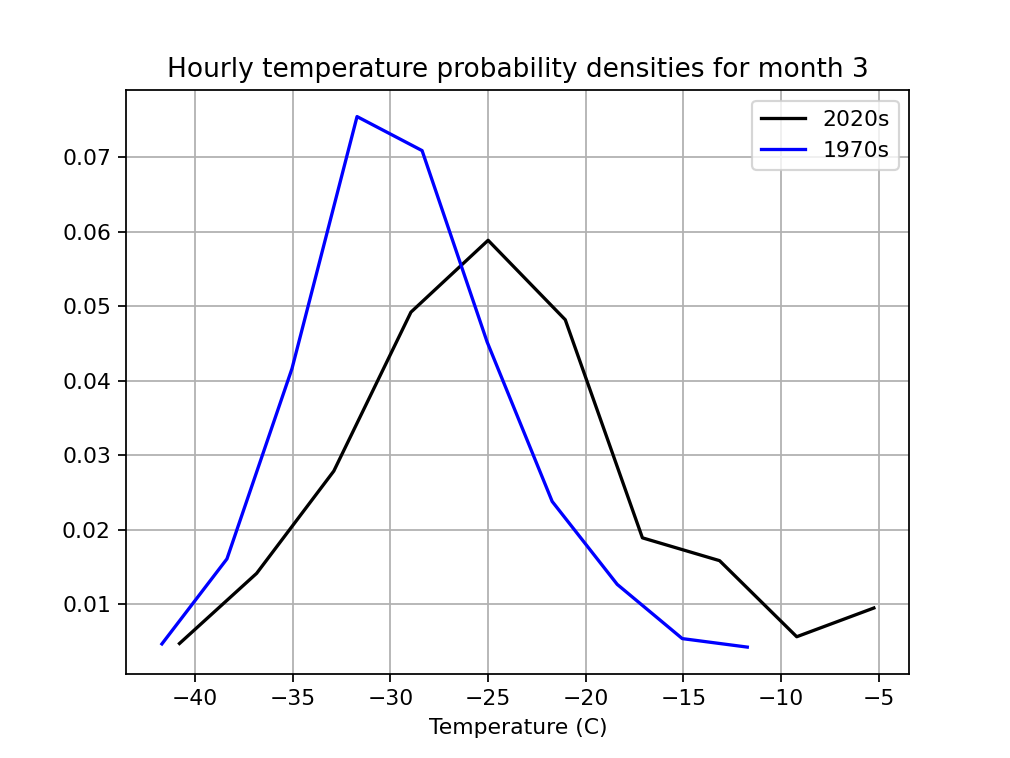

0.8900000000000001
Ratio =  5.617977528089887


In [15]:
### BEGIN SOLUTION
badindices = df1970s[ df1970s['temperature'] == -999.9 ].index
print('I am dropping this many missing data points: ', len(badindices))
df1970s.drop(badindices,inplace=True)

badindices = df2020s[ df2020s['temperature'] == -999.9 ].index
print('I am dropping this many missing data points: ', len(badindices))
df2020s.drop(badindices,inplace=True)

# # Plot the data 
# plt.figure()
# plt.plot(df2022['month'], df2022['temperature'], 'kx', label='2022')
# plt.plot(df1977['month'], df1977['temperature'], 'b+', label='1977')
# plt.xlabel('month')
# plt.ylabel('Temperature (C)')
# plt.title('Time series for years 1977 and 2022')
# plt.grid()
# plt.legend()

# Plot the histograms
df2020s_month_of_interest = df2020s[df2020s['month'] == month_of_interest]
df1970s_month_of_interest = df1970s[df1970s['month'] == month_of_interest]

h2020s_month_of_interest, e2020s_month_of_interest = np.histogram(df2020s_month_of_interest['temperature'],density=True)
h1970s_month_of_interest, e1970s_month_of_interest = np.histogram(df1970s_month_of_interest['temperature'],density=True)

plt.figure()
plt.plot(e2020s_month_of_interest[0:-1],h2020s_month_of_interest,'k',label='2020s')
plt.plot(e1970s_month_of_interest[0:-1],h1970s_month_of_interest,'b',label='1970s')
plt.title('Hourly temperature probability densities for month '+str(month_of_interest))
plt.xlabel('Temperature (C)')
plt.grid()
plt.legend()

# Not part of the solution, but part of the next answer, about global temperatures 
deltaT_BRW_March = 5
# The NOAA website given below says median values of 0.22 in 1978, and 1.11 in 2022
deltaT_global_March = 1.11 - 0.22
print(deltaT_global_March)
print('Ratio = ', deltaT_BRW_March/deltaT_global_March)

### END SOLUTION

### Pause for analysis
In the space below, comment on the following:

1. Does it seem to you that inferences made from the 3-year probability density curves you just got are more or less reliable than from the 1-year probability densities you got before? One criterion you can use for this purpose: spiky probability densities tend to be an indicator of less reliable statistics.
1. What *is* the trend we're seeing in terms of temperature at Utqiakvik? Say, from most probable in the 1970s to most probable in the 2020s.
1. For the same month of interest, and for the same range of years, compute the **ratio** of most-probable warming in Utqiakvik, to global land and ocean warming given at https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/1/3/1850-2023. (For the latter, since there are multiple years to choose from, take the median of each 3-year period.)

### BEGIN SOLUTION

1. The 3-year data probability densites are smoother than the 1-year data, so that seems encouraging.
1. Warming by five degrees Celsius. 
1. The ratio seems to be 5.6, which is higher than the oft-quoted ratio of 3 or 4.

### END SOLUTION

### Extensions
Your last task is to extend these ideas to other meteorological variables, both using the two multi-year dataframes (1970s and 2020s at BRW) you've already built. You have two choices:

1. Compare monthly time series and probability densities of the daily *wind direction* ('winddirection'). If you choose this option, you need to know that the flag for bad wind direction is -999.0. You'll also need to check NOAA's metadata for units so you can annotate your graphs appropriately.
1. Compare monthly time series and probability densities of the daily *wind speed* ('windspeed'). If you choose this option, you need to know that the flag for bad wind speed data back in the 1970s was -99.9, and the flag for bad windspeed in the 2020s is -999.9. You'll also need to check NOAA's metadata for units so you can annotate your graphs appropriately.

I am dropping this many missing data points:  358
I am dropping this many missing data points:  73


<IPython.core.display.Javascript object>


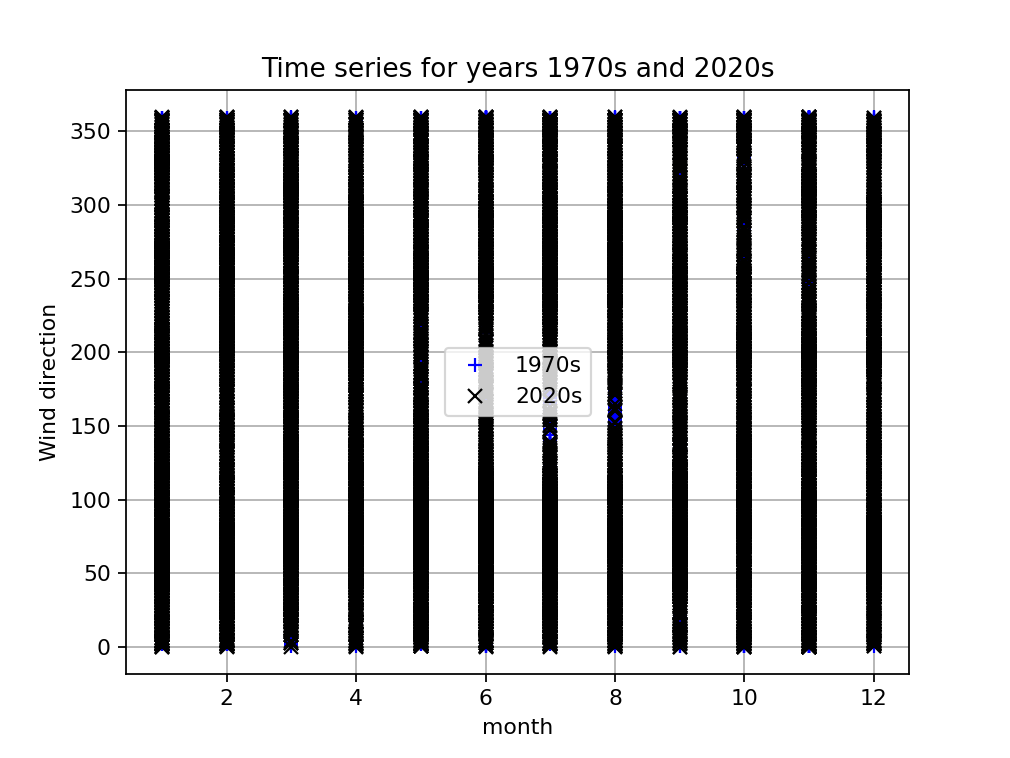

<IPython.core.display.Javascript object>


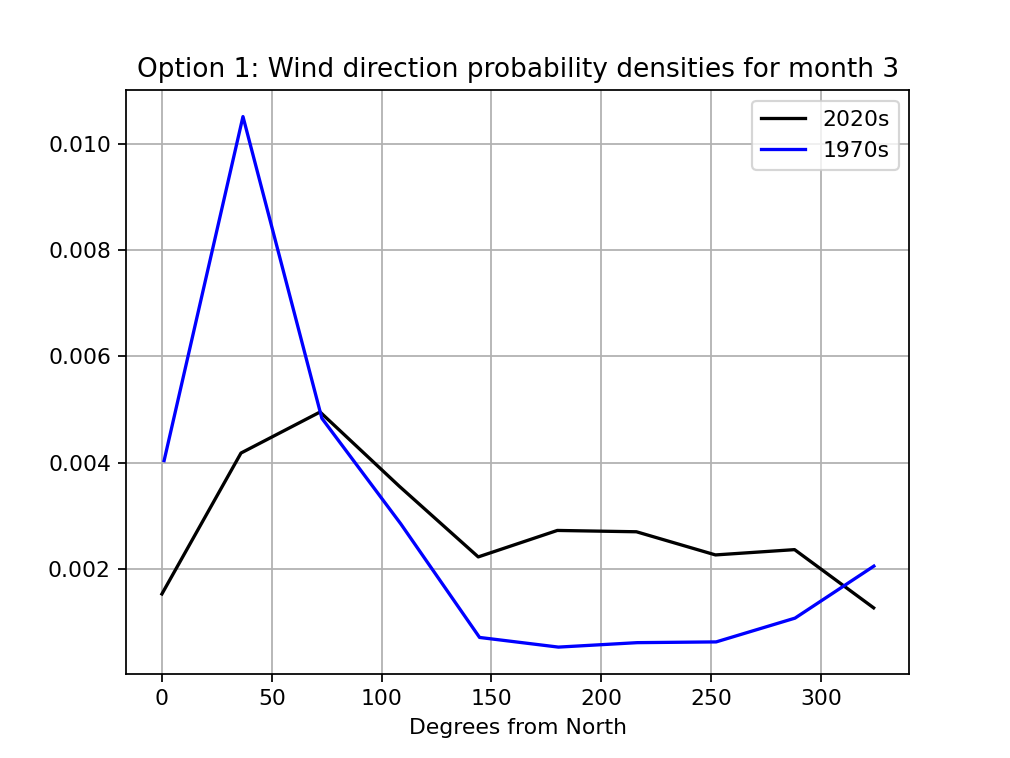

I am dropping this many missing data points:  0
I am dropping this many missing data points:  0


<IPython.core.display.Javascript object>


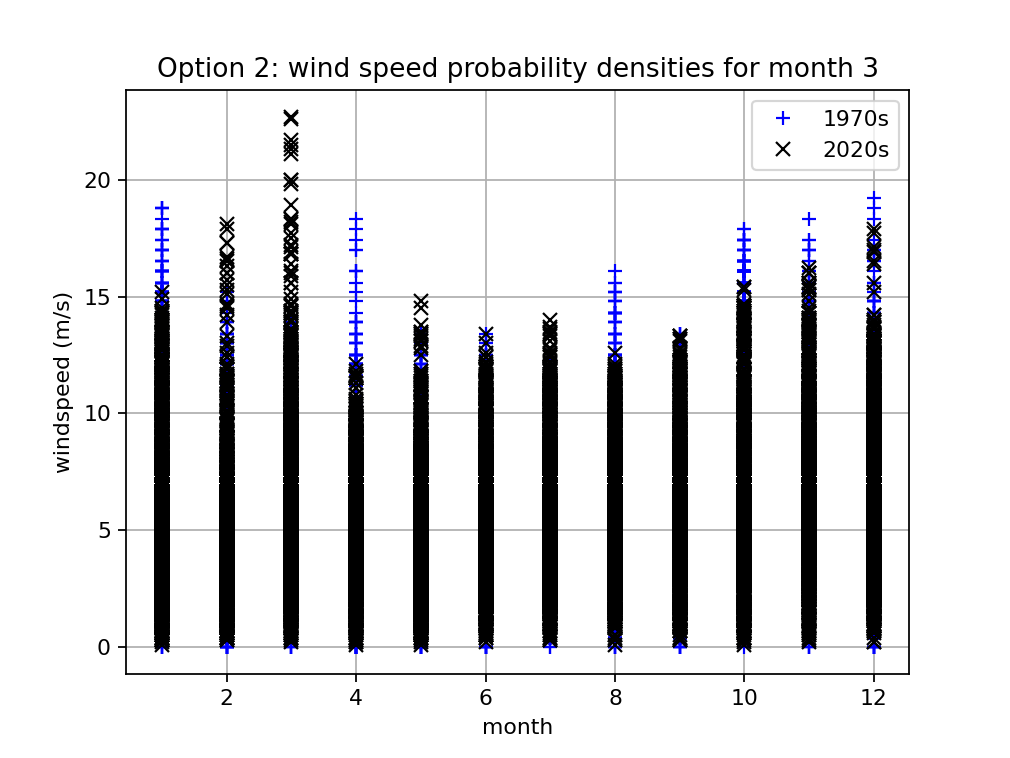

<IPython.core.display.Javascript object>


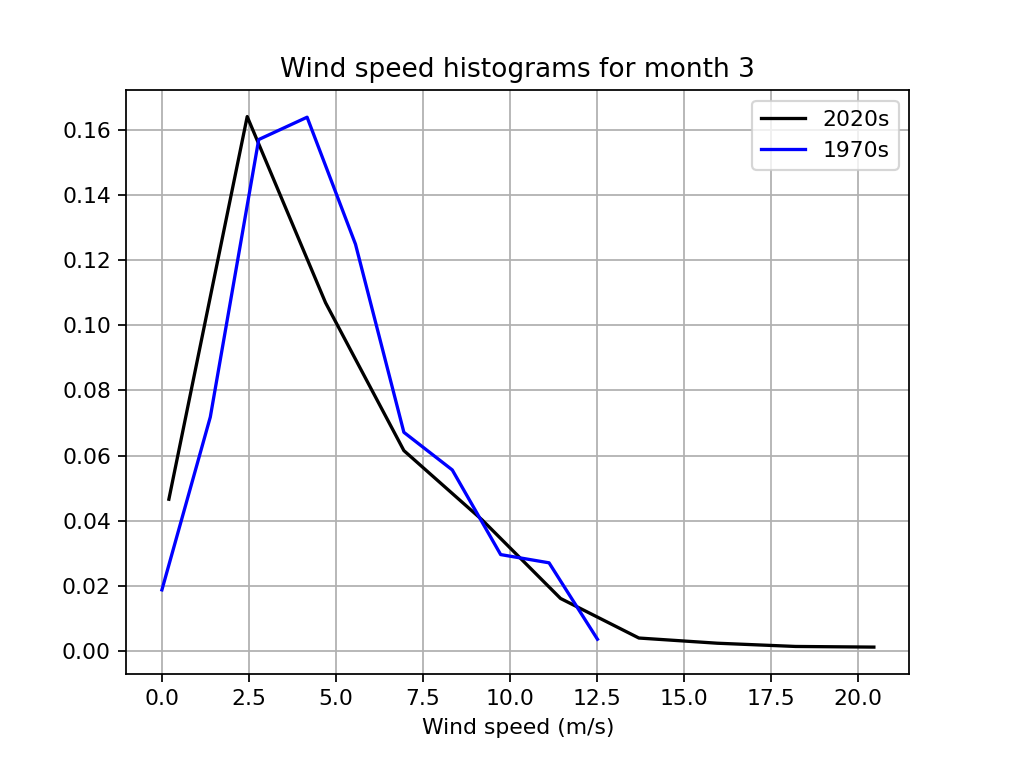

In [16]:
### BEGIN SOLUTION

Option = 1
badindices = df1970s[ df1970s['winddirection'] == -999.0 ].index
print('I am dropping this many missing data points: ', len(badindices))
df1970s.drop(badindices,inplace=True)

badindices = df2020s[ df2020s['winddirection'] == -999.0 ].index
print('I am dropping this many missing data points: ', len(badindices))
df2020s.drop(badindices,inplace=True)

# Plot the data 
plt.figure()
plt.plot(df1970s['month'], df1970s['winddirection'], 'b+', label='1970s')
plt.plot(df2020s['month'], df2020s['winddirection'], 'kx', label='2020s')
plt.xlabel('month')
plt.ylabel('Wind direction')
plt.title('Time series for years 1970s and 2020s')
plt.grid()
plt.legend()

# Plot the histograms
df2020s_month_of_interest = df2020s[df2020s['month'] == month_of_interest]
df1970s_month_of_interest = df1970s[df1970s['month'] == month_of_interest]

h2020s_month_of_interest, e2020s_month_of_interest = np.histogram(df2020s_month_of_interest['winddirection'],density=True)
h1970s_month_of_interest, e1970s_month_of_interest = np.histogram(df1970s_month_of_interest['winddirection'],density=True)

plt.figure()
plt.plot(e2020s_month_of_interest[0:-1],h2020s_month_of_interest,'k',label='2020s')
plt.plot(e1970s_month_of_interest[0:-1],h1970s_month_of_interest,'b',label='1970s')
plt.title('Option 1: Wind direction probability densities for month '+str(month_of_interest))
plt.xlabel('Degrees from North')
plt.grid()
plt.legend()

Option = 2
badindices = df1970s[ df1970s['windspeed'] == -99.9 ].index
print('I am dropping this many missing data points: ', len(badindices))
df1970s.drop(badindices,inplace=True)

badindices = df2020s[ df2020s['windspeed'] == -999.9 ].index
print('I am dropping this many missing data points: ', len(badindices))
df2020s.drop(badindices,inplace=True)

# Plot the data 
plt.figure()
plt.plot(df1970s['month'], df1970s['windspeed'], 'b+', label='1970s')
plt.plot(df2020s['month'], df2020s['windspeed'], 'kx', label='2020s')
plt.xlabel('month')
plt.ylabel('windspeed (m/s)')
plt.title('Option 2: wind speed probability densities for month '+str(month_of_interest))
plt.grid()
plt.legend()

# Plot the histograms
df2020s_month_of_interest = df2020s[df2020s['month'] == month_of_interest]
df1970s_month_of_interest = df1970s[df1970s['month'] == month_of_interest]

h2020s_month_of_interest, e2020s_month_of_interest = np.histogram(df2020s_month_of_interest['windspeed'],density=True)
h1970s_month_of_interest, e1970s_month_of_interest = np.histogram(df1970s_month_of_interest['windspeed'],density=True)

plt.figure()
plt.plot(e2020s_month_of_interest[0:-1],h2020s_month_of_interest,'k',label='2020s')
plt.plot(e1970s_month_of_interest[0:-1],h1970s_month_of_interest,'b',label='1970s')
plt.title('Wind speed histograms for month '+str(month_of_interest))
plt.xlabel('Wind speed (m/s)')
plt.grid()
plt.legend()

### END SOLUTION

### Pause for analysis
Describe the trend you see; as before, key ideas are most-probable values, and variablity. Examples ... 
- "Winds nowadays in Utqiakvik appear to be coming more from the West (or East)"  
- "Utqiakvik appears to be getting windier (or less windy) in today's warmer climate"
- "Wind speed in Utqiakvik seems to have remained about the same since the 1970s"

### BEGIN SOLUTION

Option 1: In March, winds nowadays in Utqiakvik appear to be coming more from the East  
Option 2: In March, Utqiakvik appears to be getting less windy in today's warmer climate

### END SOLUTION

### Refresh/save/validate
Double-check everything is OK, and press the "Validate" button (as usual).

### Close/submit/logout
Close, submit, and log out.